# Table of Contents

- [Imports](#imports)
- [Plan](#plan)
- [Data Cleaning](#cleaning)

## Imports <a id='imports'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

## Plan <a id="plan"></a>

I have three "cuts" of the data that I want to perform machine learning on:

- all the usable data (i.e. excluding entries that don't have reports)

- the "Auburn" cut, which should remove Vultology reports from authors that have 20 or fewer reports (since they are less experienced)

- the "Lapis" cut, layered over the Auburn cut, which should take into account this analysis:
"I'm seeing something rather suspicious in the data. If I calculate P-axis coordinates with the formula (Suspended - Grounded )/(Suspended + Grounded ), which ranges from -1 (completely Grounded) to +1 (completely Suspended), then there are 90 samples with -1, i.e., Grounded with zero signal mixing.  However, there are only 8 samples in the (-1, -0.9] interval.  In the (-0.9, 0.8] interval there are 40 samples. IMO that strongly suggests that many of those Grounded samples with zero P-axis signal mixing have neglected Suspended signals. The other end of the spectrum also looks suspicious, though it's less extreme. 
There are 36 samples with P-axis coordinates of 1 (Suspended with zero signal mixing), only 3 samples in the [0.9, 1) interval, but 26 samples in the [0.8, 0.9) interval. As for J-axis coordinates, (Measured - Candid)/(Measured + Candid), there are 55 samples with coordinates of 1 (Measured with zero signal mixing), 23 samples in the [0.9, 1) interval, and 35 in the [0.8, 0.9) interval.  There's still an odd dip, but it's a lot less suspicious. At the other end, there are 23 samples with -1 (Candid with zero signal mixing), 12 samples in the (-1, -0.9] interval and 18 samples in the (-0.9, -0.8] interval. It might be worth repeating the statistical analysis reported earlier in this channel just on samples in the (-0.9, 0.9) intervals."

We will see if these different versions of the data give different statistical results or different results in machine learning algorithms.

## Data Cleaning <a id="cleaning"></a>

In [2]:
all_df = pd.read_csv("../Data/posts_2024-12-29.csv")
all_df.head()

,Post Title,Author,Bio,Video URL,Video 2 URL,Video 3 URL,GIF Breakdown,Status,Type,Development,...,SU5 Brushstrokes Eye Toggles,SU6 Eye Head Trailing Motions,SU7 Levity Effect,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions
0,Janina Ramirez,Sierra Schwartz,Dr. Janina Ramirez is a distinguished art hist...,https://www.youtube.com/watch?v=7I8ocwXM9tw,https://www.youtube.com/watch?v=nkbUTbBJRdk,https://www.youtube.com/watch?v=V9j7XBnUpKU&t=...,https://docs.google.com/document/d/1csuIkMFoA2...,NaN,tesi,i-i-,...,4.0,2.0,4.0,2.0,4.0,4.0,2.0,NaN,2.0,NaN
1,Zeena Schreck,Sierra Schwartz,"Zeena Schreck (née LaVey) is an artist, musici...",https://www.youtube.com/watch?v=hurX8Tp3Mys,https://www.youtube.com/watch?v=EmWXuEKTLcY&t=...,https://www.youtube.com/watch?v=oT2jyy97wns&t=...,https://docs.google.com/document/d/1nU_Mn4A9dS...,NaN,fise,i-i-,...,NaN,NaN,NaN,2.0,2.0,2.0,NaN,2.0,2.0,2.0
2,"Sandra Lee ""Dr. Pimple Popper""",Sierra Schwartz,"Dr. Sandra Lee, widely known as Dr. Pimple Pop...",https://www.youtube.com/watch?v=6r-7ke3bPWI,https://www.youtube.com/watch?v=QegxWeEF2v8&t=20s,https://www.youtube.com/watch?v=KO0D8j57ugc&t=...,https://docs.google.com/document/d/1FoNISiu6Bb...,NaN,teni,i-i-,...,2.0,NaN,NaN,NaN,4.0,7.0,2.0,2.0,2.0,NaN
3,Johnny Depp,Ash Rose,"Johnny Depp (born June 9, 1963, in Owensboro, ...",https://www.youtube.com/watch?v=Z61poirKUwQ,https://www.youtube.com/watch?v=yvJoujHrE7Y,https://www.youtube.com/watch?v=y1JbkoCmebM,https://docs.google.com/document/d/17csaWSjQKP...,NaN,tise,iii-,...,2.0,2.0,NaN,2.0,4.0,4.0,2.0,4.0,NaN,2.0
4,Pierre Poilievre,Peter Foy,Pierre Poilievre is a Canadian politician and ...,https://www.youtube.com/watch?v=noIgE8MHsLA&t=12s,https://www.youtube.com/watch?v=vZz6D81gy8U&t=17s,https://www.youtube.com/watch?v=ZE1ha0L7160&t=37s,NaN,NaN,tesi,ii--,...,2.0,2.0,NaN,NaN,2.0,2.0,NaN,4.0,7.0,2.0


In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 91 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Post Title                     1211 non-null   object 
 1   Author                         1211 non-null   object 
 2   Bio                            553 non-null    object 
 3   Video URL                      1211 non-null   object 
 4   Video 2 URL                    507 non-null    object 
 5   Video 3 URL                    464 non-null    object 
 6   GIF Breakdown                  303 non-null    object 
 7   Status                         555 non-null    object 
 8   Type                           1211 non-null   object 
 9   Development                    1211 non-null   object 
 10  Emotions                       1211 non-null   object 
 11  Fallen Affect                  713 non-null    object 
 12  J Signal Mixing                455 non-null    o

I need to understand what all of these columns mean so that I know if I will need them.

- Post Title: name, which may be needed for indexing
- Author: the Vultology report author, it will be needed in research regarding the Auburn cut
- Bio: not needed for now, but could be useful for future research
- Video urls and GIF breakdown: not needed for now

I don't know what Status is in this context, so let's start making a list of unneeded columns and explore Status

In [4]:
unneeded = ['Bio', 'Video URL', 'Video 2 URL', 'Video 3 URL', 'GIF Breakdown']
unneeded

['Bio', 'Video URL', 'Video 2 URL', 'Video 3 URL', 'GIF Breakdown']

In [5]:
all_df['Status'].value_counts()

Status
publish          547
peer_reviewed      5
pending            3
Name: count, dtype: int64

Considering that a lot of those values are NaN, and most of the rest have the unclear designation "Publish", I doubt this is a meaningful feature, since technically all of these should be peer reviewed before being published anyways (thus the distinction between "Publush" and "Peer Review" is muddled)

We will certainly need type and development. Let's look at more of the columns:

In [6]:
unneeded.append('Status')
unneeded

['Bio', 'Video URL', 'Video 2 URL', 'Video 3 URL', 'GIF Breakdown', 'Status']

In [7]:
all_df.iloc[:, 10:].head()

,Emotions,Fallen Affect,J Signal Mixing,P Signal Mixing,Alternative,Sex,Age Range,Geography,Ethnicity,Checkbox,...,SU5 Brushstrokes Eye Toggles,SU6 Eye Head Trailing Motions,SU7 Levity Effect,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions
0,seelie,0,low,low,NaN,female,1980s,western_europe,white/european,NaN,...,4.0,2.0,4.0,2.0,4.0,4.0,2.0,NaN,2.0,NaN
1,unseelie,3,high,low,TiSe I-I-,female,1960s,north_america,white/european,NaN,...,NaN,NaN,NaN,2.0,2.0,2.0,NaN,2.0,2.0,2.0
2,seelie,0,low,low,NaN,female,1970s,north_america,han_chinese,NaN,...,2.0,NaN,NaN,NaN,4.0,7.0,2.0,2.0,2.0,NaN
3,neutral,2,low,low,TiSe III-,male,1960s,north_america,white/european,NaN,...,2.0,2.0,NaN,2.0,4.0,4.0,2.0,4.0,NaN,2.0
4,unseelie,1,low,medium,NaN,male,1970s,north_america,white/european,NaN,...,2.0,2.0,NaN,NaN,2.0,2.0,NaN,4.0,7.0,2.0


In [8]:
all_df['Emotions'].value_counts()

Emotions
unseelie     301
adaptive     294
seelie       256
directive    239
neutral      121
Name: count, dtype: int64

In [9]:
all_df['Fallen Affect'].value_counts()

Fallen Affect
0      332
1      146
2      128
3       96
4        7
5        3
No`      1
Name: count, dtype: int64

In [10]:
all_df['Alternative'].value_counts()

Alternative
TiNe                              9
Other developments                8
FiNe                              7
II--                              7
SeTi                              6
                                 ..
NeTi l-l-                         1
I--- (3rd vid). Alt type: TiSe    1
TiSe I-I                          1
II-- (3rd vid)                    1
NeFi III-                         1
Name: count, Length: 129, dtype: int64

In [11]:
all_df['Sex'].value_counts()

Sex
male      745
female    463
m2f         2
f2m         1
Name: count, dtype: int64

In [12]:
all_df['Age Range'].value_counts()

Age Range
-1       376
1980s    124
1990s     91
1970s     75
1960s     58
1950s     50
1940s     32
1930s     20
2000s     17
1920s     13
1800s      8
1900s      6
1910s      5
Name: count, dtype: int64

In [13]:
all_df['Geography'].value_counts()

Geography
-1                          333
north_america               300
western_europe              149
eastern_europe               26
latin_america                17
australia/new_zeland         14
middle_east/north_africa     10
east_asia                     8
south_asia                    5
sub-sahara_africa             4
southern_europe               2
north_asia                    2
caribbean                     2
south_caucasus                1
southeast_asia                1
central_asia                  1
Name: count, dtype: int64

In [14]:
all_df['Ethnicity'].value_counts()

Ethnicity
white/european     365
-1                 338
jewish              48
black/african       39
other/unknown       29
hispanic/latino     18
east_asian          12
arabic               8
han_chinese          5
indo-aryan           4
indian               3
iranian/persian      2
turkic               2
native_american      1
nepalese             1
Name: count, dtype: int64

In [15]:
all_df['Checkbox'].value_counts()

Series([], Name: count, dtype: int64)

In [16]:
all_df['Checkbox 1'].value_counts()

Checkbox 1
juan_e._sandoval | calin_copil                                                 67
juan_e._sandoval | calin_copil | peter_j._foy                                  60
juan_e._sandoval                                                               42
juan_e._sandoval | calin_copil | ash_rose                                      33
calin_copil | peter_j._foy                                                     29
                                                                               ..
calin_copil | peter_j._foy | luke_connolly | miriam_greenfield                  1
peter_j._foy | sierra_rose | miriam_greenfield                                  1
ash_rose | jacquelyn_scott | peter_j._foy | sierra_rose | miriam_greenfield     1
calin_copil | ash_rose | ahmad_aldroubi                                         1
calin_copil | jacquelyn_scott | peter_j._foy                                    1
Name: count, Length: 101, dtype: int64

We will need emotions (since neutral is a relatively recently added feature of CT theory, we should make sure the numbers it has make sense, otherwise might have to recalculate it with signal scores, also we're going to want to group unseelie and directive in the same guarded category, and so on)

We will need Fallen affect (I'm assuming it makes sense to consider NaN values as 0 since no Fallen Affect was observed for samples with NaN values, which may or may not turn out to actually be correct for the sample)

Signal mixing would be good information to have as we may want to focus on samples with or without it, Auburn mentioned to me that it might have to be recalculated however (and might make more sense as a number than as an arbitrary category)

Alternative is unnecessary since we have the raw signal data and thus all alternative typings or developments can be easily calculated

Sex is useful information to look for systematic differences, additionally male and female alone aren't going to equal total number of samples because there are some noted trans samples

Age Range, Geography and Ethnicity could be useful for cross-sectional analysis (-1 will treated as a NaN value unless I want to work to replace it myself)

Checkbox is either empty or contains presumably a list of Vultologists that agree with the given typing result, so neither of these are necessary

In [17]:
unneeded.append('Alternative')
unneeded.append('Checkbox')
unneeded.append('Checkbox 1')
unneeded

['Bio',
 'Video URL',
 'Video 2 URL',
 'Video 3 URL',
 'GIF Breakdown',
 'Status',
 'Alternative',
 'Checkbox',
 'Checkbox 1']

In [18]:
all_df.iloc[:, 21:].head()

,R1 Rigid Posture Copy,R2 Face Centric,R3 Punctuated Motions,R4 Vertical Movements,R5 Subordinate Fluidity,F1 Fluid Posture,F2 Eye Centric,F3 Gliding Motions,F4 Horizontal Movements,F5 Subordinate Rigidity,...,SU5 Brushstrokes Eye Toggles,SU6 Eye Head Trailing Motions,SU7 Levity Effect,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions
0,2.0,4.0,4.0,7.0,4.0,4.0,2.0,2.0,4.0,NaN,...,4.0,2.0,4.0,2.0,4.0,4.0,2.0,NaN,2.0,NaN
1,4.0,7.0,4.0,4.0,4.0,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,NaN,2.0,2.0,2.0,NaN,2.0,2.0,2.0
2,7.0,4.0,7.0,4.0,4.0,NaN,NaN,2.0,4.0,NaN,...,2.0,NaN,NaN,NaN,4.0,7.0,2.0,2.0,2.0,NaN
3,4.0,4.0,4.0,4.0,4.0,2.0,2.0,NaN,4.0,NaN,...,2.0,2.0,NaN,2.0,4.0,4.0,2.0,4.0,NaN,2.0
4,7.0,7.0,7.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,2.0,2.0,NaN,4.0,7.0,2.0


The remaining columns seem to be bonafide vultology signals, in which NaN should be replaced with 0. R1 also does not need to include "Copy" in its name

In [19]:
all_df.drop(labels=unneeded, axis=1, inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Post Title                     1211 non-null   object 
 1   Author                         1211 non-null   object 
 2   Type                           1211 non-null   object 
 3   Development                    1211 non-null   object 
 4   Emotions                       1211 non-null   object 
 5   Fallen Affect                  713 non-null    object 
 6   J Signal Mixing                455 non-null    object 
 7   P Signal Mixing                453 non-null    object 
 8   Sex                            1211 non-null   object 
 9   Age Range                      875 non-null    object 
 10  Geography                      875 non-null    object 
 11  Ethnicity                      875 non-null    object 
 12  R1 Rigid Posture Copy          492 non-null    f

Now we need to fill each column appropriately:
- Post Title should be changed to Sample Name
- Author can be changed to Vultologist
- Copy should be removed from the R1 signal name
- Emotions should just be Guarded, Unguarded and Neutral
- Fallen Affect should have just 6 numerical values between 0 and 5, rather than being a string
- NaN values in all Vultology signals (including Fallen Affect) should be replaced with 0

Later after I fix more values, I will (among other things):
- Recalculate Emotions based on signal values to make sure the number of neutral samples is correct
- Recalculate signal mixing as a number between 0 and 1, 1 being right in the middle, 0 being on the farthest possible edge

In [20]:
all_columns = list(all_df.columns)
all_columns[0] = 'Sample Name'
all_columns[1] = 'Vultologist'
all_columns[12] = 'R1 Rigid Posture'
all_df.columns = all_columns
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample Name                    1211 non-null   object 
 1   Vultologist                    1211 non-null   object 
 2   Type                           1211 non-null   object 
 3   Development                    1211 non-null   object 
 4   Emotions                       1211 non-null   object 
 5   Fallen Affect                  713 non-null    object 
 6   J Signal Mixing                455 non-null    object 
 7   P Signal Mixing                453 non-null    object 
 8   Sex                            1211 non-null   object 
 9   Age Range                      875 non-null    object 
 10  Geography                      875 non-null    object 
 11  Ethnicity                      875 non-null    object 
 12  R1 Rigid Posture               492 non-null    f

In [21]:
all_df.loc[:, "Emotions"] = all_df.loc[:, "Emotions"].replace({"unseelie": "guarded", "adaptive": "unguarded", "directive": "guarded", "seelie": "unguarded"})
all_df['Emotions'].value_counts()

Emotions
unguarded    550
guarded      540
neutral      121
Name: count, dtype: int64

In [22]:
all_df['Fallen Affect'].value_counts()

Fallen Affect
0      332
1      146
2      128
3       96
4        7
5        3
No`      1
Name: count, dtype: int64

In [23]:
all_df.loc[:, "Fallen Affect"] = all_df.loc[:, "Fallen Affect"].replace('No`', 0)
all_df['Fallen Affect'].value_counts()

Fallen Affect
0    332
1    146
2    128
3     96
4      7
5      3
0      1
Name: count, dtype: int64

In [24]:
all_df['Fallen Affect'] = all_df['Fallen Affect'].astype('float')
all_df['Fallen Affect'].value_counts()

Fallen Affect
0.0    333
1.0    146
2.0    128
3.0     96
4.0      7
5.0      3
Name: count, dtype: int64

In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample Name                    1211 non-null   object 
 1   Vultologist                    1211 non-null   object 
 2   Type                           1211 non-null   object 
 3   Development                    1211 non-null   object 
 4   Emotions                       1211 non-null   object 
 5   Fallen Affect                  713 non-null    float64
 6   J Signal Mixing                455 non-null    object 
 7   P Signal Mixing                453 non-null    object 
 8   Sex                            1211 non-null   object 
 9   Age Range                      875 non-null    object 
 10  Geography                      875 non-null    object 
 11  Ethnicity                      875 non-null    object 
 12  R1 Rigid Posture               492 non-null    f

In [26]:
all_df.iloc[:, 5] = all_df.iloc[:, 5].fillna(0)
all_df.iloc[:, 12:] = all_df.iloc[:, 12:].fillna(0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample Name                    1211 non-null   object 
 1   Vultologist                    1211 non-null   object 
 2   Type                           1211 non-null   object 
 3   Development                    1211 non-null   object 
 4   Emotions                       1211 non-null   object 
 5   Fallen Affect                  1211 non-null   float64
 6   J Signal Mixing                455 non-null    object 
 7   P Signal Mixing                453 non-null    object 
 8   Sex                            1211 non-null   object 
 9   Age Range                      875 non-null    object 
 10  Geography                      875 non-null    object 
 11  Ethnicity                      875 non-null    object 
 12  R1 Rigid Posture               1211 non-null   f

At this point, the data should be workable enough to examine its distributions

In [27]:
all_df.describe()

,Fallen Affect,R1 Rigid Posture,R2 Face Centric,R3 Punctuated Motions,R4 Vertical Movements,R5 Subordinate Fluidity,F1 Fluid Posture,F2 Eye Centric,F3 Gliding Motions,F4 Horizontal Movements,...,SU5 Brushstrokes Eye Toggles,SU6 Eye Head Trailing Motions,SU7 Levity Effect,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions
count,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,...,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000
mean,0.605285,1.703551,1.705202,1.744013,1.795211,1.031379,1.872007,1.886870,1.792733,1.997523,...,1.132948,0.519405,0.845582,0.547481,1.241123,1.635838,0.861272,0.664740,0.951280,1.243600
std,1.022607,2.520097,2.479629,2.293837,2.337126,2.071612,2.518225,2.592025,2.273268,2.482500,...,1.989559,1.210933,1.700297,1.442570,1.864765,2.198498,1.687262,1.399494,1.770774,1.938973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,4.000000,4.000000,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,...,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
max,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Right away you can notice that the columns have very similar numbers, but there are a lot of zeroes around even the 50 and 75 percentiles of data, which reminds me that many of these rows contains ALL zeroes because unfortunately many of the samples don't even have reports at all, so we need to deal with that issue to get any sense of the range of our data in the first place.

There are also too many columns for us to realistically check all of them, so we can use the transpose on our all_df and then describe the ranges for the various percentages, mean and std, etc., to make sure nothing is amiss.

We'll start by investigating the sums of the rows, because some rows also have sums that aren't zero but are also very low numbers that don't make sense, so zero probably won't be the cutoff to put aside the data for now

In [28]:
all_num = all_df.select_dtypes(include='number')
all_num

,Fallen Affect,R1 Rigid Posture,R2 Face Centric,R3 Punctuated Motions,R4 Vertical Movements,R5 Subordinate Fluidity,F1 Fluid Posture,F2 Eye Centric,F3 Gliding Motions,F4 Horizontal Movements,...,SU5 Brushstrokes Eye Toggles,SU6 Eye Head Trailing Motions,SU7 Levity Effect,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions
0,0.0,2.0,4.0,4.0,7.0,4.0,4.0,2.0,2.0,4.0,...,4.0,2.0,4.0,2.0,4.0,4.0,2.0,0.0,2.0,0.0
1,3.0,4.0,7.0,4.0,4.0,4.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0
2,0.0,7.0,4.0,7.0,4.0,4.0,0.0,0.0,2.0,4.0,...,2.0,0.0,0.0,0.0,4.0,7.0,2.0,2.0,2.0,0.0
3,2.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,0.0,4.0,...,2.0,2.0,0.0,2.0,4.0,4.0,2.0,4.0,0.0,2.0
4,1.0,7.0,7.0,7.0,7.0,4.0,2.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,2.0,2.0,0.0,4.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1207,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1208,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1209,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
all_sum = all_num.sum(axis=1)
all_sum.sort_values()

605      0.0
678      0.0
677      0.0
676      0.0
675      0.0
       ...  
157    267.0
62     268.0
171    271.0
19     274.0
102    281.0
Length: 1211, dtype: float64

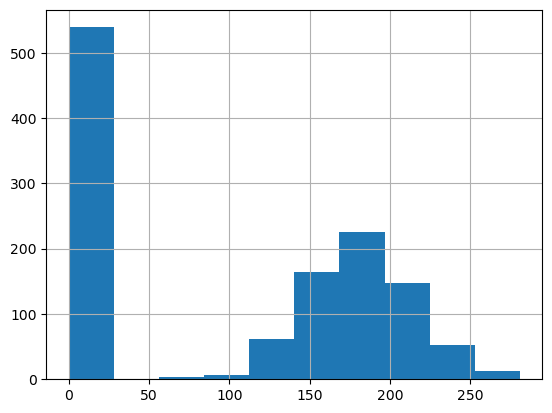

In [30]:
all_sum.hist();

The giant column of zeroes is non-useful data and there might be some very small columns next to it (with values only slightly above 0) that we can't even see which also wouldn't be useful since the samples would not have a sufficient number of signals marked for a proper report

In [31]:
all_sum.sort_values().describe()

count    1211.000000
mean      100.519405
std        93.069131
min         0.000000
25%         0.000000
50%       139.000000
75%       183.000000
max       281.000000
dtype: float64

We can certainly get rid of all rows that sum to zero, then we can use the head function to investigate where any jumps to realistic report signal totals occur

In [32]:
all_df = all_df[all_sum > 0]
all_df.shape

(718, 82)

That alone wiped out 493 rows, so let's remake the sum of rows to find the cutoff point that we're going to use

In [33]:
all_num = all_df.select_dtypes(include='number')
all_sum = all_num.sum(axis=1)

all_sum.sort_values().head(30)

1208    1.0
1204    1.0
1203    2.0
1202    2.0
1200    2.0
897     3.0
737     3.0
738     3.0
764     3.0
792     3.0
797     3.0
799     3.0
804     3.0
824     3.0
833     3.0
848     3.0
893     3.0
886     3.0
721     3.0
907     3.0
908     3.0
919     3.0
921     3.0
927     3.0
928     3.0
930     3.0
885     3.0
991     3.0
715     3.0
528     3.0
dtype: float64

That's at least 30 values that are still too low to constitute a serious report, which is kind of strange. We'll have to look at the hist again

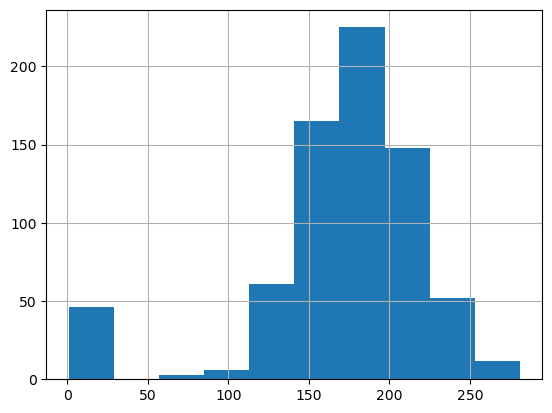

In [34]:
all_sum.hist();

It looks like we can safely consider anything below 50 as non-useful data, because it is so beneath the norm for a Vultology report signal total as to be completely outside the primary distribution and thus such samples won't reflect any norms or general conclusions in the data. Let's examine the values below 50 and the values above 50 to get a closer look at the cutoff

In [35]:
all_sum[all_sum <= 50].sort_values()

1204    1.0
1208    1.0
1203    2.0
1202    2.0
1200    2.0
487     3.0
848     3.0
885     3.0
886     3.0
893     3.0
897     3.0
907     3.0
921     3.0
919     3.0
927     3.0
928     3.0
930     3.0
991     3.0
908     3.0
824     3.0
833     3.0
799     3.0
505     3.0
507     3.0
517     3.0
528     3.0
564     3.0
577     3.0
804     3.0
603     3.0
604     3.0
578     3.0
639     3.0
715     3.0
721     3.0
737     3.0
738     3.0
764     3.0
792     3.0
797     3.0
630     3.0
1205    5.0
1201    8.0
1207    8.0
1209    8.0
1206    9.0
dtype: float64

Not only are these below 50, they are far below, which further supports the idea that they should not be included.

In [36]:
all_sum[all_sum > 50].sort_values().head(30)

1128     74.0
435      78.0
1115     83.0
1099     90.0
1023     93.0
1152     95.0
1154     97.0
1189    100.0
1101    103.0
459     113.0
1110    113.0
175     114.0
1089    115.0
209     116.0
1192    116.0
277     117.0
373     118.0
464     118.0
1113    119.0
1061    122.0
265     124.0
414     125.0
369     125.0
379     126.0
376     127.0
70      127.0
1024    127.0
427     129.0
384     130.0
444     130.0
dtype: float64

These are all far above 50 and follow a pretty continuous, predictable distribution, so I believe that these values fall within a sufficiently normal range to use.

So we'll just get rid of everything under 50 and add sum of signals as a column to the dataframe so we can stay organized

In [37]:
all_df = all_df[all_sum > 50]
all_df.shape

(672, 82)

We just need to check for duplicates to make sure there isn't any funny business

In [38]:
all_df.duplicated().sum()

0

There are no duplicates

We are going to add a column for the sum of signals in the report so that we can investigate the distribution for the sum of signals as well

In [39]:
all_num = all_df.select_dtypes(include='number')
all_df.loc[:, 'sum'] = all_num.sum(axis=1)
all_df.describe()

,Fallen Affect,R1 Rigid Posture,R2 Face Centric,R3 Punctuated Motions,R4 Vertical Movements,R5 Subordinate Fluidity,F1 Fluid Posture,F2 Eye Centric,F3 Gliding Motions,F4 Horizontal Movements,...,SU6 Eye Head Trailing Motions,SU7 Levity Effect,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions,sum
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,...,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,0.909226,3.069940,3.025298,3.142857,3.235119,1.858631,3.373512,3.400298,3.230655,3.599702,...,0.936012,1.523810,0.986607,2.236607,2.947917,1.552083,1.197917,1.714286,2.241071,180.915179
std,1.096983,2.692849,2.617882,2.255077,2.276967,2.489791,2.522403,2.638509,2.160218,2.310257,...,1.501241,2.044082,1.821743,2.010175,2.200521,2.014914,1.700652,2.084340,2.130940,32.793037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
25%,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,159.000000
50%,0.000000,2.000000,2.000000,2.000000,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,2.000000,179.500000
75%,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,7.000000,4.000000,4.000000,...,2.000000,2.000000,2.000000,4.000000,4.000000,2.000000,2.000000,2.500000,4.000000,203.000000
max,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,281.000000


These numbers look more sensible but there are still a surprising amount with 0 values around the median of some signals, but that could just indicate a relatively rare signal. The most frequent signals marked is an interesting topic in itself

In [40]:
all_df['sum'].describe()

count    672.000000
mean     180.915179
std       32.793037
min       74.000000
25%      159.000000
50%      179.500000
75%      203.000000
max      281.000000
Name: sum, dtype: float64

Those are the summary statistics for the number of signals marked in a vultology report, very interesting. The mean and the median are pretty close too which makes the distribution pretty balanced.

Let's look at the vultology signals with the highest and lowest means

In [41]:
all_means = all_df.drop(['sum', 'Fallen Affect'], axis=1).describe().loc['mean', :]
all_means.describe()

count    70.000000
mean      2.571514
std       0.772490
min       0.936012
25%       2.023810
50%       2.597470
75%       3.186384
max       4.291667
Name: mean, dtype: float64

This is also a very believable and balanced distribution with close mean and median.

The 10 least marked vultology signals are:

In [42]:
all_means.sort_values().head(10)

SU6 Eye Head Trailing Motions    0.936012
SU8 Quirky Skits                 0.986607
CA9 Grasping Hands               1.093750
EG1 Upset Mouth Tension          1.197917
MS9 Puppeteer Hands              1.363095
CA8 Nasal Breathy Voice          1.502976
CA5 Asymmetrical Smirks          1.514881
SU7 Levity Effect                1.523810
EU3 Bashful Body Movements       1.552083
EG2 Assertive Pushing            1.714286
Name: mean, dtype: float64

In general some of the Ne/Si signals seem rare or difficult to understand, so them being so low is interesting and believable in a sense

The top 10 most marked vultology signals:

In [43]:
all_means.sort_values(ascending=False).head(10)

PR5 Projecting Hands       4.291667
PF2 Toggling Eyes          3.950893
PR4 Fluent Articulation    3.875000
PR1 Head Pushes            3.690476
PF4 Casual Hands           3.610119
F4 Horizontal Movements    3.599702
GR3 Taut Outer Edges       3.589286
PF3 Body Swaying           3.535714
RR5 Meticulous Hands       3.492560
PR2 Head Shakes            3.407738
Name: mean, dtype: float64

A lot of these signals are things that most people do (project their hands some, talk and articulate, look around, etc.), or are very distinctive like taut outer edges. That definitely makes sense but I wonder if a future version of the codifier will add greater nuance to these signals to distinguish them for ordinary behavior, if that's even necessary

Let's also look at std

In [44]:
all_std = all_df.drop(['sum', 'Fallen Affect'], axis=1).describe().loc['std', :]
all_std.describe()

count    70.000000
mean      2.306475
std       0.287220
min       1.501241
25%       2.164291
50%       2.308938
75%       2.511009
max       2.889009
Name: std, dtype: float64

Also a typically balanced distribution

Bottom 10 (so most unvarying signals)

In [45]:
all_std.sort_values().head(10)

SU6 Eye Head Trailing Motions    1.501241
PR3 Shoulder Shrugs              1.673406
EG1 Upset Mouth Tension          1.700652
CA9 Grasping Hands               1.779622
RR4 Momentum Halting             1.800723
SU8 Quirky Skits                 1.821743
MS9 Puppeteer Hands              1.844719
RR3 Exerted Pushes               1.879930
CA5 Asymmetrical Smirks          1.920883
RF4 Searching Scowling           1.975221
Name: std, dtype: float64

Interestingly, it's a lot of the same one's that had low means, so in having low values they probably have less chance to vary

In [46]:
all_std.sort_values(ascending=False).head(10)

MS2 Horizontal Curtain Smiles    2.889009
GR3 Taut Outer Edges             2.820154
MS3 Two Point Pulling            2.721188
R1 Rigid Posture                 2.692849
MS8 Laryngeal Faint Voice        2.677346
GR1 Taut Preseptal Area          2.675684
F2 Eye Centric                   2.638509
MS7 Parabolic Velocity           2.637278
F5 Subordinate Rigidity          2.625019
R2 Face Centric                  2.617882
Name: std, dtype: float64

So since these signals vary a lot, I would look at it as them being more like "you have it or you don't" (since there would be a less populated grey area between extreme values), which makes sense for things like the tautness of eye areas and having a Measured smile and/or face, middling cases are rarer. Measured does seem particulary strong in this regard though, which is noteworthy.

The other columns of data that would be important to have and know the distributions of are:
- create a column for quadra
- create a column for lead energetic
- look at the distribution of each group of signals to see if there are any patterns

Not to mention some other tasks we previously set:
- Recalculate Emotions based on signal values to make sure the number of neutral samples is correct
- Recalculate signal mixing as a number between 0 and 1, 1 being right in the middle, 0 being on the farthest possible edge
- And we can of course look at the distribution of those as well, along with that of every other signal

Before we calculate the scores needed to create these columns, we will reset the index of signals_df to make it a uniform RangeIndex so that it's easier to iterate through

In [47]:
all_df.reset_index(drop=True, inplace=True)
all_df.index

RangeIndex(start=0, stop=672, step=1)

In [48]:
Lead_Energetic = []

for i in range(len(all_df)):
    type = all_df['Type'][i]
    if type in ('fesi', 'feni', 'teni', 'tesi'):
        Lead_Energetic.append('Je')
    elif type in ('sife', 'nife', 'nite', 'site'):
        Lead_Energetic.append('Pi')
    elif type in ('neti', 'seti', 'sefi', 'nefi'):
        Lead_Energetic.append('Pe')
    elif type in ('tine', 'tise', 'fise', 'fine'):
        Lead_Energetic.append('Ji')

LE_series = pd.Series(Lead_Energetic)
LE_series.head()

0    Je
1    Ji
2    Je
3    Ji
4    Je
dtype: object

In [49]:
LE_series.value_counts()

Pe    230
Je    178
Pi    141
Ji    123
Name: count, dtype: int64

In [50]:
100 * LE_series.value_counts() / len(LE_series)

Pe    34.226190
Je    26.488095
Pi    20.982143
Ji    18.303571
Name: count, dtype: float64

Yet again, all energetics have a pretty healthy sample size, but the data is significantly skewed in favor of extroverts, which makes sense since they are obviously more common amongst celebrities

In [51]:
all_df['Lead Energetic'] = LE_series
all_df.head()

,Sample Name,Vultologist,Type,Development,Emotions,Fallen Affect,J Signal Mixing,P Signal Mixing,Sex,Age Range,...,SU7 Levity Effect,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions,sum,Lead Energetic
0,Janina Ramirez,Sierra Schwartz,tesi,i-i-,unguarded,0.0,low,low,female,1980s,...,4.0,2.0,4.0,4.0,2.0,0.0,2.0,0.0,177.0,Je
1,Zeena Schreck,Sierra Schwartz,fise,i-i-,guarded,3.0,high,low,female,1960s,...,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,188.0,Ji
2,"Sandra Lee ""Dr. Pimple Popper""",Sierra Schwartz,teni,i-i-,unguarded,0.0,low,low,female,1970s,...,0.0,0.0,4.0,7.0,2.0,2.0,2.0,0.0,195.0,Je
3,Johnny Depp,Ash Rose,tise,iii-,neutral,2.0,low,low,male,1960s,...,0.0,2.0,4.0,4.0,2.0,4.0,0.0,2.0,208.0,Ji
4,Pierre Poilievre,Peter Foy,tesi,ii--,guarded,1.0,low,medium,male,1970s,...,0.0,0.0,2.0,2.0,0.0,4.0,7.0,2.0,196.0,Je


In [52]:
Quadra = []

for i in range(len(all_df)):
    type = all_df['Type'][i]
    if type in ('fesi', 'sife', 'neti', 'tine'):
        Quadra.append('Alpha')
    elif type in ('feni', 'nife', 'seti', 'tise'):
        Quadra.append('Beta')
    elif type in ('teni', 'nite', 'sefi', 'fise'):
        Quadra.append('Gamma')
    elif type in ('tesi', 'site', 'nefi', 'fine'):
        Quadra.append('Delta')

Quadra_series = pd.Series(Quadra)
Quadra_series.head()

0    Delta
1    Gamma
2    Gamma
3     Beta
4    Delta
dtype: object

In [53]:
Quadra_series.value_counts()

Beta     224
Gamma    175
Alpha    144
Delta    129
Name: count, dtype: int64

In [54]:
100 * Quadra_series.value_counts() / len(Quadra_series)

Beta     33.333333
Gamma    26.041667
Alpha    21.428571
Delta    19.196429
Name: count, dtype: float64

It needs to be kept in mind that Grounded types are more plentiful in our data, perhaps because they are more common among celebrities. Though all quadras have a healthy sample size overall.

In [55]:
all_df['Quadra'] = Quadra_series
all_df.head()

,Sample Name,Vultologist,Type,Development,Emotions,Fallen Affect,J Signal Mixing,P Signal Mixing,Sex,Age Range,...,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions,sum,Lead Energetic,Quadra
0,Janina Ramirez,Sierra Schwartz,tesi,i-i-,unguarded,0.0,low,low,female,1980s,...,2.0,4.0,4.0,2.0,0.0,2.0,0.0,177.0,Je,Delta
1,Zeena Schreck,Sierra Schwartz,fise,i-i-,guarded,3.0,high,low,female,1960s,...,2.0,2.0,2.0,0.0,2.0,2.0,2.0,188.0,Ji,Gamma
2,"Sandra Lee ""Dr. Pimple Popper""",Sierra Schwartz,teni,i-i-,unguarded,0.0,low,low,female,1970s,...,0.0,4.0,7.0,2.0,2.0,2.0,0.0,195.0,Je,Gamma
3,Johnny Depp,Ash Rose,tise,iii-,neutral,2.0,low,low,male,1960s,...,2.0,4.0,4.0,2.0,4.0,0.0,2.0,208.0,Ji,Beta
4,Pierre Poilievre,Peter Foy,tesi,ii--,guarded,1.0,low,medium,male,1970s,...,0.0,2.0,2.0,0.0,4.0,7.0,2.0,196.0,Je,Delta


Now we can take a look at the distribution of types

In [56]:
all_df['Type'].value_counts()

Type
seti    86
sefi    59
feni    51
teni    50
nife    49
neti    46
fesi    44
nefi    39
tise    38
nite    35
tesi    33
fise    31
sife    31
fine    31
site    26
tine    23
Name: count, dtype: int64

In [57]:
100 * all_df['Type'].value_counts() / len(all_df['Type'])

Type
seti    12.797619
sefi     8.779762
feni     7.589286
teni     7.440476
nife     7.291667
neti     6.845238
fesi     6.547619
nefi     5.803571
tise     5.654762
nite     5.208333
tesi     4.910714
fise     4.613095
sife     4.613095
fine     4.613095
site     3.869048
tine     3.422619
Name: count, dtype: float64

These distributions are pretty predictable from the above, but a few might be slightly more problematic, because two of the types (SiTe and TiNe) have less than 30 samples (though some are close to that). This is important because with a sample size of less than 30, certain statistical tests like ANOVA and t-tests can't be properly run since certain assumptions like the Central Limit Theorem don't properly apply. For some purposes, like just clustering our signals outright, I'm not sure precisely how much it matters, but more samples would obviously be good.

Now let's look at developments

In [58]:
all_df['Development'].value_counts()

Development
i---    190
i-i-    115
ii--    105
i--i     73
iii-     57
ii-i     53
i-ii     46
iiii     33
Name: count, dtype: int64

In [59]:
100 * all_df['Development'].value_counts() / len(all_df['Development'])

Development
i---    28.273810
i-i-    17.113095
ii--    15.625000
i--i    10.863095
iii-     8.482143
ii-i     7.886905
i-ii     6.845238
iiii     4.910714
Name: count, dtype: float64

These are very sensible numbers, and they seem to confirm the polarity of the opposite energetics, because opposite energetics are the rarest to have integrated together. That being said, Grant stack assumptions are not necessarily confirmed, because having another function of the same vertness integrated is more common than having a function similar in conducting or revising. However, the preponderance of extroverts in this dataset combined with the fact that extroverted function integrations would seem to be more common for celebrities suggests that this data may not tell us which developments are necessarily more common (because the data is biased towards these more extroverted samples and it's not a random sample of the population).

We could even investigate this question by looking at which lead energetics most frequently have 'I-I-' development:

In [60]:
all_df[all_df['Development'] == 'i-i-']['Lead Energetic'].value_counts()

Lead Energetic
Pe    59
Je    46
Pi     6
Ji     4
Name: count, dtype: int64

In [61]:
all_df[all_df['Development'] == 'ii--']['Lead Energetic'].value_counts()

Lead Energetic
Pi    40
Ji    27
Pe    21
Je    17
Name: count, dtype: int64

And this EXACTLY confirms what we thought: that Pe and Je celebrities are the people common with the 'I-I-' development, whereas introverts with this development are much rarer among celebrities, which makes sense since they would be extra introverted. Thus the fact that 'I-I-' is more common in our data than 'II--' doesn't tell us much about what is more common in general, since the distribution for 'II--' is more balanced and even more common for introverts in our data because it would give them a more extroverted function integration, which also comports with our assumptions.

Finally let's examine emotional attidudes, then we'll work with a different set of data

In [62]:
all_df['Emotions'].value_counts()

Emotions
unguarded    314
guarded      237
neutral      121
Name: count, dtype: int64

In [63]:
100 * all_df['Emotions'].value_counts() / len(all_df['Emotions'])

Emotions
unguarded    46.726190
guarded      35.267857
neutral      18.005952
Name: count, dtype: float64

These are pretty healthy sample sizes, so they should not be too much of a problem for our data, but we could try to split our analyses on this attribute if we want to be extra cautious in checking (or use it to perform cross-sectional analysis)

We were previously concerned that the number of neutral may be incorrect because neutral is a relatively new concept in CT theory that older samples may not have been typed in accordance with, so we want to recalculate the number of neutral samples based on the direct values of the emotional attitude signals

In [64]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample Name                    672 non-null    object 
 1   Vultologist                    672 non-null    object 
 2   Type                           672 non-null    object 
 3   Development                    672 non-null    object 
 4   Emotions                       672 non-null    object 
 5   Fallen Affect                  672 non-null    float64
 6   J Signal Mixing                455 non-null    object 
 7   P Signal Mixing                453 non-null    object 
 8   Sex                            672 non-null    object 
 9   Age Range                      672 non-null    object 
 10  Geography                      672 non-null    object 
 11  Ethnicity                      672 non-null    object 
 12  R1 Rigid Posture               672 non-null    flo

In [65]:
Emotions = []
Emotion_Values = []
Emotion_Diffs = []

for i in range(len(all_df)):
    EU = all_df.loc[i, 'EU1 Responsive Nodding':'EU3 Bashful Body Movements'].sum()
    EG = all_df.loc[i, 'EG1 Upset Mouth Tension':'EG3 Stern Expressions'].sum()
    EA = EG - EU
    if abs(EA) < 5:
        Emotions.append('neutral')
        if abs(EA) == EA:
            Emotion_Diffs.append(EA)
        else:
            Emotion_Diffs.append(-EA)
    elif EU > EG:
        Emotions.append('unguarded')
        Emotion_Diffs.append(-EA)
    else:
        Emotions.append('guarded')
        Emotion_Diffs.append(EA)
    if EU+EG == 0:
        Emotion_Values.append(0)
    else:
        Emotion_Values.append(EA/(EG+EU))

Emotion_series = pd.Series(Emotions)
Emotion_series.head()

0    unguarded
1      neutral
2    unguarded
3      neutral
4      guarded
dtype: object

In [66]:
Emotion_series.value_counts()

neutral      288
unguarded    235
guarded      149
Name: count, dtype: int64

In [67]:
100 * Emotion_series.value_counts() / len(Emotion_series)

neutral      42.857143
unguarded    34.970238
guarded      22.172619
Name: count, dtype: float64

In [68]:
all_df['Emotions'] = Emotion_series
all_df.head()

,Sample Name,Vultologist,Type,Development,Emotions,Fallen Affect,J Signal Mixing,P Signal Mixing,Sex,Age Range,...,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions,sum,Lead Energetic,Quadra
0,Janina Ramirez,Sierra Schwartz,tesi,i-i-,unguarded,0.0,low,low,female,1980s,...,2.0,4.0,4.0,2.0,0.0,2.0,0.0,177.0,Je,Delta
1,Zeena Schreck,Sierra Schwartz,fise,i-i-,neutral,3.0,high,low,female,1960s,...,2.0,2.0,2.0,0.0,2.0,2.0,2.0,188.0,Ji,Gamma
2,"Sandra Lee ""Dr. Pimple Popper""",Sierra Schwartz,teni,i-i-,unguarded,0.0,low,low,female,1970s,...,0.0,4.0,7.0,2.0,2.0,2.0,0.0,195.0,Je,Gamma
3,Johnny Depp,Ash Rose,tise,iii-,neutral,2.0,low,low,male,1960s,...,2.0,4.0,4.0,2.0,4.0,0.0,2.0,208.0,Ji,Beta
4,Pierre Poilievre,Peter Foy,tesi,ii--,guarded,1.0,low,medium,male,1970s,...,0.0,2.0,2.0,0.0,4.0,7.0,2.0,196.0,Je,Delta


It turns out that we were right to suspect that the number of neutral signals was incorrect, and now we have a much better estimation of the EA distribution. It's also noteworthy that EA is not a bimodal trait, but unipolar and closer to normal.

I'm also going to include a value for EA that ranges from -1 to 1 where -1 stands for unguarded and 1 stands for guarded, so we can see it as a roughly continuous value as well, using the Emotion_Values we collected, and another value for the raw difference between Unguarded and Guarded signals since the normalized value doesn't capture absolute differences well:

In [69]:
Emotion_Val = pd.Series(Emotion_Values)
Emotion_Val.head()

0   -0.666667
1    0.200000
2   -0.529412
3   -0.250000
4    0.529412
dtype: float64

In [70]:
Emotion_Val.describe()

count    672.000000
mean      -0.130525
std        0.667142
min       -1.000000
25%       -0.719048
50%       -0.200000
75%        0.388462
max        1.000000
dtype: float64

In [71]:
all_df['Emotion_Val'] = Emotion_Val
all_df.head()

,Sample Name,Vultologist,Type,Development,Emotions,Fallen Affect,J Signal Mixing,P Signal Mixing,Sex,Age Range,...,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions,sum,Lead Energetic,Quadra,Emotion_Val
0,Janina Ramirez,Sierra Schwartz,tesi,i-i-,unguarded,0.0,low,low,female,1980s,...,4.0,4.0,2.0,0.0,2.0,0.0,177.0,Je,Delta,-0.666667
1,Zeena Schreck,Sierra Schwartz,fise,i-i-,neutral,3.0,high,low,female,1960s,...,2.0,2.0,0.0,2.0,2.0,2.0,188.0,Ji,Gamma,0.200000
2,"Sandra Lee ""Dr. Pimple Popper""",Sierra Schwartz,teni,i-i-,unguarded,0.0,low,low,female,1970s,...,4.0,7.0,2.0,2.0,2.0,0.0,195.0,Je,Gamma,-0.529412
3,Johnny Depp,Ash Rose,tise,iii-,neutral,2.0,low,low,male,1960s,...,4.0,4.0,2.0,4.0,0.0,2.0,208.0,Ji,Beta,-0.250000
4,Pierre Poilievre,Peter Foy,tesi,ii--,guarded,1.0,low,medium,male,1970s,...,2.0,2.0,0.0,4.0,7.0,2.0,196.0,Je,Delta,0.529412


In [72]:
Emotion_RawDiff = pd.Series(Emotion_Diffs)
Emotion_RawDiff.head()

0    8.0
1    2.0
2    9.0
3    4.0
4    9.0
dtype: float64

In [73]:
Emotion_RawDiff.describe()

count    672.000000
mean       6.782738
std        4.839954
min        0.000000
25%        3.000000
50%        6.000000
75%       10.000000
max       21.000000
dtype: float64

In [74]:
all_df['Emotion_RawDiff'] = Emotion_RawDiff
all_df.head()

,Sample Name,Vultologist,Type,Development,Emotions,Fallen Affect,J Signal Mixing,P Signal Mixing,Sex,Age Range,...,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions,sum,Lead Energetic,Quadra,Emotion_Val,Emotion_RawDiff
0,Janina Ramirez,Sierra Schwartz,tesi,i-i-,unguarded,0.0,low,low,female,1980s,...,4.0,2.0,0.0,2.0,0.0,177.0,Je,Delta,-0.666667,8.0
1,Zeena Schreck,Sierra Schwartz,fise,i-i-,neutral,3.0,high,low,female,1960s,...,2.0,0.0,2.0,2.0,2.0,188.0,Ji,Gamma,0.200000,2.0
2,"Sandra Lee ""Dr. Pimple Popper""",Sierra Schwartz,teni,i-i-,unguarded,0.0,low,low,female,1970s,...,7.0,2.0,2.0,2.0,0.0,195.0,Je,Gamma,-0.529412,9.0
3,Johnny Depp,Ash Rose,tise,iii-,neutral,2.0,low,low,male,1960s,...,4.0,2.0,4.0,0.0,2.0,208.0,Ji,Beta,-0.250000,4.0
4,Pierre Poilievre,Peter Foy,tesi,ii--,guarded,1.0,low,medium,male,1970s,...,2.0,0.0,4.0,7.0,2.0,196.0,Je,Delta,0.529412,9.0


In [75]:
all_df.loc[all_df['Emotion_RawDiff'] == 21]

,Sample Name,Vultologist,Type,Development,Emotions,Fallen Affect,J Signal Mixing,P Signal Mixing,Sex,Age Range,...,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions,sum,Lead Energetic,Quadra,Emotion_Val,Emotion_RawDiff
7,Marion Cotillard,Peter Foy,fise,iiii,unguarded,0.0,medium,low,female,1970s,...,7.0,7.0,0.0,0.0,0.0,236.0,Ji,Gamma,-1.0,21.0
71,Natalie Cuomo,Ahmad Aldroubi,seti,ii--,unguarded,0.0,low,low,female,1990s,...,7.0,7.0,0.0,0.0,0.0,235.0,Pe,Beta,-1.0,21.0
161,Caspar Lee,Ahmad Aldroubi,neti,ii--,unguarded,0.0,NaN,NaN,male,1990s,...,7.0,7.0,0.0,0.0,0.0,224.0,Pe,Alpha,-1.0,21.0
177,Dean Schneider,Ahmad Aldroubi,seti,i-i-,unguarded,0.0,low,low,male,1990s,...,7.0,7.0,0.0,0.0,0.0,217.0,Pe,Beta,-1.0,21.0
183,Tamino,Ahmad Aldroubi,seti,i--i,unguarded,3.0,low,high,male,1990s,...,7.0,7.0,0.0,0.0,0.0,245.0,Pe,Beta,-1.0,21.0
302,Irving Finkel,Juan E. Sandoval,teni,i-i-,guarded,2.0,low,low,male,1950s,...,0.0,0.0,7.0,7.0,7.0,189.0,Je,Gamma,1.0,21.0
329,Adolf Hitler,Juan E. Sandoval,tesi,i--i,guarded,5.0,low,high,male,1800s,...,0.0,0.0,7.0,7.0,7.0,204.0,Je,Delta,1.0,21.0
420,Aushra Augusta,Juan E. Sandoval,teni,ii--,guarded,0.0,medium,low,female,1910s,...,0.0,0.0,7.0,7.0,7.0,193.0,Je,Gamma,1.0,21.0
567,Jordan Peterson,Calin Copil,feni,iiii,guarded,3.0,NaN,NaN,male,-1,...,0.0,0.0,7.0,7.0,7.0,217.0,Je,Beta,1.0,21.0
575,Jiddu Krishnamurti,Calin Copil,nite,iii-,guarded,3.0,NaN,NaN,male,-1,...,0.0,0.0,7.0,7.0,7.0,162.0,Pi,Gamma,1.0,21.0


There are 11 samples here with a difference of 21 points between emotional attitudes, which is very high, so it's worth checking. According to the Vultology database on the website, all of thee values are correct except Jordan Peterson, who is supposed to have 19 instead, and one of his signals is recorded differently in the data than the on the website. I also checked Peterson's other signals to confirm that they were correct, and they were. Since it's not even clear which value is correct, the one in the data (which says Peterson has 0 for responsive nodding) or on the site (which says he has a 2 for the that signal), I won't change anything for now.

Next we want to recalculate signal mixing, not as a categorical attribute, but as a number between 0 and 1, 1 being right in the middle (maximum signal mixing), 0 being on the farthest possible edge (zero signal mixing, purely on one side or the other).:

In [76]:
J_Mixing = []
P_Mixing = []

for i in range(len(all_df)):
    CA = all_df.loc[i, 'CA1 Taut Nasolabial Area':'CA9 Grasping Hands'].sum()
    MS = all_df.loc[i, 'MS1 Lax Nasolabial Area':'MS9 Puppeteer Hands'].sum()
    GR = all_df.loc[i, 'GR1 Taut Preseptal Area':'GR8 Bodily Awareness'].sum()
    SU = all_df.loc[i, 'SU1 Lax Preseptal Area':'SU8 Quirky Skits'].sum()
    J_diff = abs(CA - MS)
    J_Tot = CA + MS
    P_diff = abs(GR - SU)
    P_Tot = GR + SU
    J_Mixing.append(1 - J_diff/J_Tot)
    P_Mixing.append(1 - P_diff/P_Tot)

J_Signal_Mixing = pd.Series(J_Mixing)
J_Signal_Mixing.head()

0    0.173913
1    0.905660
2    0.357143
3    0.085106
4    0.240000
dtype: float64

In [77]:
J_Signal_Mixing.describe()

count    672.000000
mean       0.368941
std        0.264113
min        0.000000
25%        0.153846
50%        0.345342
75%        0.571429
max        0.984127
dtype: float64

In [78]:
all_df['J_Signal_Mixing'] = J_Signal_Mixing
all_df.head()

,Sample Name,Vultologist,Type,Development,Emotions,Fallen Affect,J Signal Mixing,P Signal Mixing,Sex,Age Range,...,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions,sum,Lead Energetic,Quadra,Emotion_Val,Emotion_RawDiff,J_Signal_Mixing
0,Janina Ramirez,Sierra Schwartz,tesi,i-i-,unguarded,0.0,low,low,female,1980s,...,2.0,0.0,2.0,0.0,177.0,Je,Delta,-0.666667,8.0,0.173913
1,Zeena Schreck,Sierra Schwartz,fise,i-i-,neutral,3.0,high,low,female,1960s,...,0.0,2.0,2.0,2.0,188.0,Ji,Gamma,0.200000,2.0,0.905660
2,"Sandra Lee ""Dr. Pimple Popper""",Sierra Schwartz,teni,i-i-,unguarded,0.0,low,low,female,1970s,...,2.0,2.0,2.0,0.0,195.0,Je,Gamma,-0.529412,9.0,0.357143
3,Johnny Depp,Ash Rose,tise,iii-,neutral,2.0,low,low,male,1960s,...,2.0,4.0,0.0,2.0,208.0,Ji,Beta,-0.250000,4.0,0.085106
4,Pierre Poilievre,Peter Foy,tesi,ii--,guarded,1.0,low,medium,male,1970s,...,0.0,4.0,7.0,2.0,196.0,Je,Delta,0.529412,9.0,0.240000


In [79]:
P_Signal_Mixing = pd.Series(P_Mixing)
P_Signal_Mixing.head()

0    0.000000
1    0.307692
2    0.285714
3    0.571429
4    0.685714
dtype: float64

In [80]:
P_Signal_Mixing.describe()

count    672.000000
mean       0.350783
std        0.271653
min        0.000000
25%        0.117647
50%        0.315789
75%        0.573308
max        0.967742
dtype: float64

In [81]:
all_df['P_Signal_Mixing'] = P_Signal_Mixing
all_df.head()

,Sample Name,Vultologist,Type,Development,Emotions,Fallen Affect,J Signal Mixing,P Signal Mixing,Sex,Age Range,...,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions,sum,Lead Energetic,Quadra,Emotion_Val,Emotion_RawDiff,J_Signal_Mixing,P_Signal_Mixing
0,Janina Ramirez,Sierra Schwartz,tesi,i-i-,unguarded,0.0,low,low,female,1980s,...,0.0,2.0,0.0,177.0,Je,Delta,-0.666667,8.0,0.173913,0.000000
1,Zeena Schreck,Sierra Schwartz,fise,i-i-,neutral,3.0,high,low,female,1960s,...,2.0,2.0,2.0,188.0,Ji,Gamma,0.200000,2.0,0.905660,0.307692
2,"Sandra Lee ""Dr. Pimple Popper""",Sierra Schwartz,teni,i-i-,unguarded,0.0,low,low,female,1970s,...,2.0,2.0,0.0,195.0,Je,Gamma,-0.529412,9.0,0.357143,0.285714
3,Johnny Depp,Ash Rose,tise,iii-,neutral,2.0,low,low,male,1960s,...,4.0,0.0,2.0,208.0,Ji,Beta,-0.250000,4.0,0.085106,0.571429
4,Pierre Poilievre,Peter Foy,tesi,ii--,guarded,1.0,low,medium,male,1970s,...,4.0,7.0,2.0,196.0,Je,Delta,0.529412,9.0,0.240000,0.685714


The values we're seeing for signal mixing seem reasonable, in that there tends to be some signal mixing (but only a low amount, since the samples tend towards one side), and there are no samples that completely mix signals (the value never reaches as high as 1 since then the sample would not be typed according to any quadra)

In [82]:
all_df.to_csv('../Data/posts_2024-12-29_CleanData.csv')